# Etapa Pré

## Pré 1 - Bibliotecas / Pacotes usados

In [ ]:
#%pip install pandas
#%pip install seaborn
#%pip install numpy
#%pip install matplotlib.pyplot
#%pip install -U scikit-learn 

 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

## Pré 2 - Funções

In [ ]:
# ===================================================================
# Configura os gráficos
def jupyter_settings():
    %matplotlib inline
    # %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [22, 9]
    plt.rcParams['font.size'] = 21

    # display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    # configura o pandas para quantidade de casas decimais
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()

jupyter_settings()

## Pré 3 - Lendo os dados - Parte 1

In [ ]:
df_raw = pd.read_csv('../banco/train.csv',)

In [ ]:
df_raw.head()

# Etapa 1 - Entendendo os dados

In [ ]:
df1 = df_raw.copy()

In [ ]:
# Visão geral das primeiras linhas
df1.head()        #primeiras 5 linhas
# df1.tail()      #últimas 5 linhas

## 1.1 Renomeando colunas

In [ ]:
# Lista dos nomes das variáveis 
df1.columns   #atributo

In [ ]:
# Renomear as colunas que estão em inglês
df1.rename(columns = {'PassengerId':'id_passageiro'
,'Survived':'sobrevivencia'
,'Pclass':'classe_ingresso'
,'Name':'nome'
,'Sex':'sexo'
,'Age':'idade'
,'SibSp':'n_irmao_conjuge_bordo'
,'Parch':'n_pais_filhos_bordo'
,'Ticket':'n_bilhete'
,'Fare':'tarifa_passageiro'
,'Cabin':'n_cabine'
,'Embarked':'porto_embarcacao'}, inplace=True)

df1.columns

## 1.2 Dimensões dos dados

In [ ]:
qtd_de_linhas = df1.shape[0]
qtd_de_colunas = df1.shape[1]
n_de_cada_var = df1.count()


print(f'O banco possui', qtd_de_linhas, 'linhas e', qtd_de_colunas, 'colunas.')
print(f'')
print(n_de_cada_var)

## 1.3 Verificando NA (missings)
### Conferindo a quantidade de missing em cada variável

In [ ]:
check_na_var = df1.isnull().sum()

In [ ]:
print(check_na_var)

## 1.4 Tipos de dados

In [ ]:
df1.dtypes

## 1.5 Modificações dos tipos

In [ ]:
# Alterar o tipo da variável duração do sono conforme exemplo abaixo:
# df['Idade'] = df['Idade'].astype('int64')
# df['Duração do sono'] = df['Duração do sono'].apply(lambda x: x.replace(',', '.'))
#lembrar que isso poderia ser corrigido na abertura do banco de dados [ex.: sep=","].
# df['Duração do sono'] = df['Duração do sono'].astype('float64')
# df['nascimento'] = pd.to_datetime(df['nascimento'], dayfirst=True)

df1['sobrevivencia'] = df1['sobrevivencia'].astype('boolean')
df1['classe_ingresso'] = df1['classe_ingresso'].astype(str)

In [ ]:
df1.dtypes

## 1.6 Conjunto das variáveis QUANTITATIVAS (Numerical Features)
### Separando os atributos entre numéricos e categóricos

In [ ]:
quantitativa_variavel = df1.select_dtypes(include = ['int64', 'float64'])

In [ ]:
quantitativa_variavel.head()

## 1.7 Conjunto das variáveis QUALITATIVAS (Categorical Features)

In [ ]:
qualitativa_variavel = df1.select_dtypes(exclude = ['int64', 'float64'])

In [ ]:
# Plotar a contagem das classes de cada variável categórica
qualitativa_variavel.apply(lambda x: x.unique().shape[0])

In [ ]:
qualitativa_variavel.head()

## 1.8 Desfecho / Target Feature

In [ ]:
# Contagem das classes
contagem = qualitativa_variavel['sobrevivencia'].value_counts()

# Percentual das classes
percentagem = (df1['sobrevivencia'].value_counts(normalize=True) * 100).round(2)

# Criar o dataframe resultante
resultado = pd.DataFrame({'Classe': contagem.index
                    ,'Contagem': contagem
                    ,'Percentual': percentagem})

# Imprimir o dataframe resultante
display(resultado)


# Etapa 2 - Análise exploriatória de dados 

In [ ]:
df2 = df1.copy()
df2.drop(['nome', 'n_bilhete'], axis = 1, inplace = True)
df2.head()

In [ ]:
df2.head()

## 2.1 Análise das variáveis QUANTITATIVAS

### 2.1.1 Estatística QUANTITATIVAS - Univariável

In [ ]:
descritiva_das_var = quantitativa_variavel.describe().T
print(descritiva_das_var)

### 2.1.2 Gráfico QUANTITATIVAS - Univariável

### BoxPlot

In [ ]:
# Plotar gráficos univariada
plt.subplot(2, 2, 1)
sns.boxplot(df2['idade']).set(title = 'Boxplot da Idade', xlabel = None, ylabel = None)
plt.subplot(2, 2, 2)
sns.boxplot(df2['n_irmao_conjuge_bordo']).set(title = 'Boxplot do n de cônjuges à bordo)', xlabel = None, ylabel = None)
plt.subplot(2, 2, 3)
sns.boxplot(df2['n_pais_filhos_bordo']).set(title = 'Boxplot do n de pais/filhos à bordo)', xlabel = None, ylabel = None)
plt.subplot(2, 2, 4)
sns.boxplot(df2['tarifa_passageiro']).set(title = 'Boxplot da tarifa paga)', xlabel = None, ylabel = None);

### Histograma

In [ ]:
# Plotar gráficos univariada
plt.subplot(2, 2, 1)
sns.histplot(df2['idade']).set(title = 'Boxplot da Idade', xlabel = None, ylabel = None)
plt.subplot(2, 2, 2)
sns.histplot(df2['n_irmao_conjuge_bordo']).set(title = 'Boxplot do n de cônjuges à bordo)', xlabel = None, ylabel = None)
plt.subplot(2, 2, 3)
sns.histplot(df2['n_pais_filhos_bordo']).set(title = 'Boxplot do n de pais/filhos à bordo)', xlabel = None, ylabel = None)
plt.subplot(2, 2, 4)
sns.histplot(df2['tarifa_passageiro']).set(title = 'Boxplot da tarifa paga)', xlabel = None, ylabel = None);

## 2.2 Análise das variáveis QUALITATIVAS

### 2.2.1 Estatística QUALITATIVAS - Univariável

In [ ]:
# Plotar todas as classes da variável Ocupação e a contagem de cada classe
df2['sobrevivencia'].value_counts()

In [ ]:
# Contagem das classes
contagem1 = qualitativa_variavel['sobrevivencia'].value_counts()
contagem2 = qualitativa_variavel['classe_ingresso'].value_counts()
contagem3 = qualitativa_variavel['porto_embarcacao'].value_counts()

# Percentual das classes
percentagem1 = (qualitativa_variavel['sobrevivencia'].value_counts(normalize=True) * 100).round(2)
percentagem2 = (qualitativa_variavel['classe_ingresso'].value_counts(normalize=True) * 100).round(2)
percentagem3 = (qualitativa_variavel['porto_embarcacao'].value_counts(normalize=True) * 100).round(2)

# Criar o dataframe resultante
resultado = pd.DataFrame({'Classe': contagem.index
                    ,'nSobrev': contagem1
                    ,'%Sobrev': percentagem1
                    ,'nClasse_ing': contagem2
                    ,'%Classe_ing': percentagem2
                    ,'nPorto': contagem3
                    ,'%Porto': percentagem3
                    })

# Imprimir o dataframe resultante
display(resultado)

### 2.2.2 Gráficos QUALITATIVAS - Univariável

In [ ]:
# Plotar gráficos univariada
plt.subplot(2, 2, 1)
sns.countplot(x='sobrevivencia', data=df2)      #gráfico de barras
plt.subplot(2, 2, 2)
sns.countplot(x='sexo', data=df2)      #gráfico de barras
plt.subplot(2, 2, 3)
sns.countplot(x='porto_embarcacao', data=df2)      #gráfico de barras
plt.subplot(2, 2, 4)
sns.countplot(x='classe_ingresso', data=df2)      #gráfico de barras

## 2.3 Análise Bivariadas

##### sns.boxplot(numerical_attributes['salario_medio']).set(title='Salário médio da profissão')
##### sns.displot(data=df, x="escolaridade", kde=True, height=6, aspect=2).set(title='Escolaridade dos trabalhadores', xlabel=None, ylabel='Contagem');
##### df.hist(figsize=(22,8));
##### sns.histplot(df.status).set(title="Variável target");
##### sns.catplot(data=df, x='periodicidade', y='salario_medio', kind='box', height=6, aspect=3,).set(title='Salário médio vs Periodicidade', ylabel='Salário U$', xlabel=None);
##### sns.countplot(data=df, x="escolaridade", hue="status").set(title='Escolaridade x Aprovação do visto', ylabel='Contagem', xlabel=None)
##### corr = numerical_attributes.corr().round(1)
##### corr
##### plt.figure(figsize=(22, 7))
##### heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
##### heatmap.set_title("Mapa de calor - Correlação", fontdict={"fontsize": 12}, pad=12);

### 2.3.1 Análises Correlação

In [ ]:
correlacao = quantitativa_variavel.corr(method = 'pearson')
correlacao

### 2.3.2 Gráficos - 

In [ ]:

sns.boxplot(y='idade', x = 'sobrevivencia', data=df2, width = 0.2)

<Axes: xlabel='sobrevivencia', ylabel='idade'>

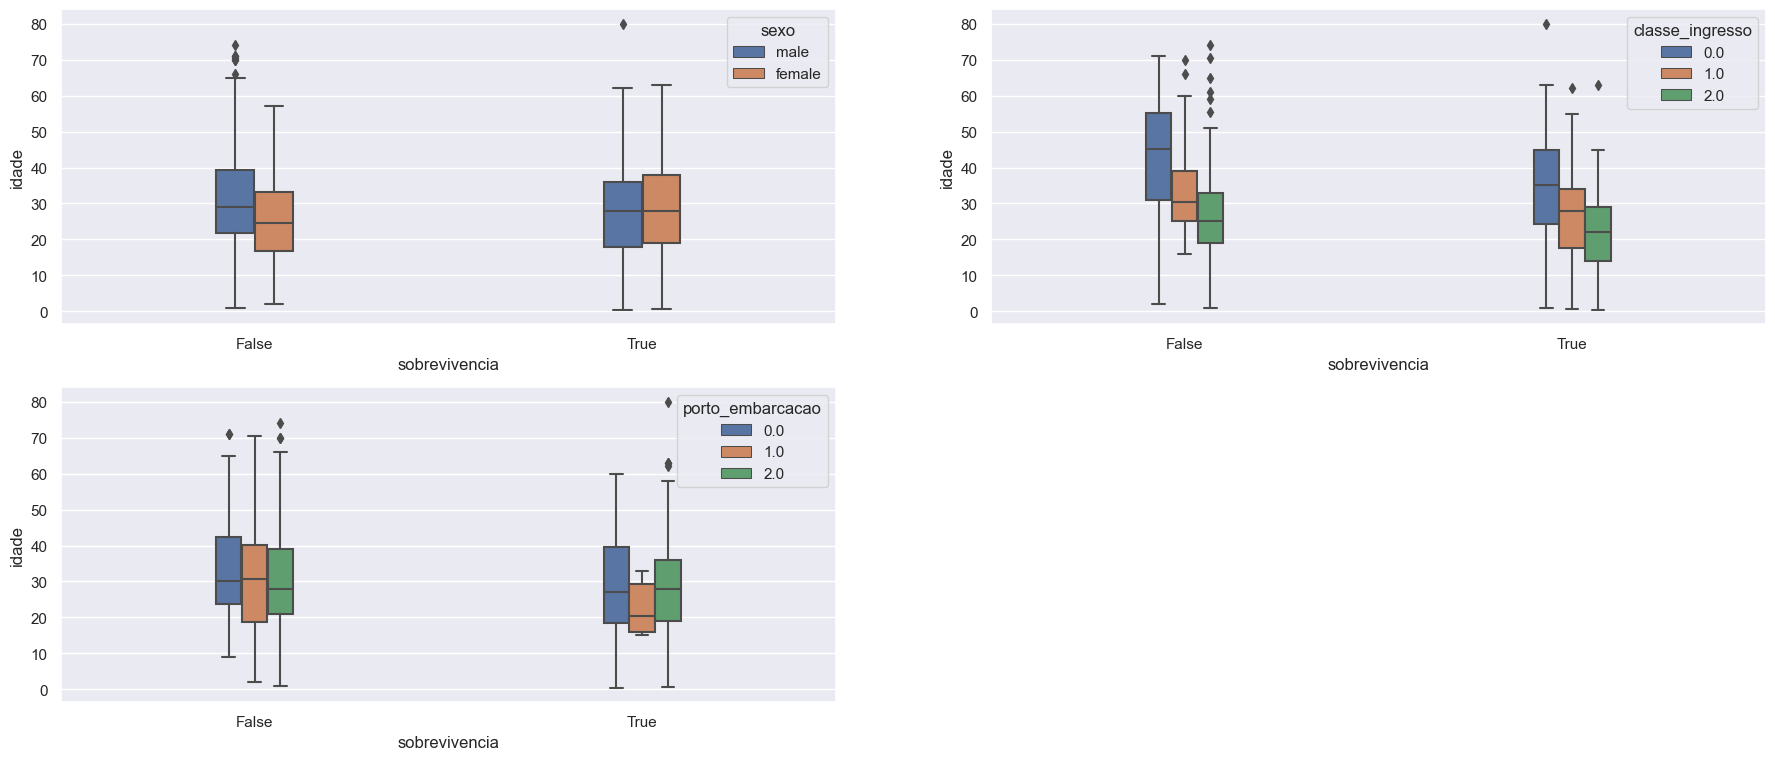

In [159]:
#Boxplot - 2 fatores (três variáveis: 1 quanti e 2 quali)
plt.subplot(2, 2, 1)
sns.boxplot(y='idade', x = 'sobrevivencia', hue = 'sexo', data=df2, width = 0.2)
plt.subplot(2, 2, 2)
sns.boxplot(y='idade', x = 'sobrevivencia', hue = 'classe_ingresso', data=df2, width = 0.2)
plt.subplot(2, 2, 3)
sns.boxplot(y='idade', x = 'sobrevivencia', hue = 'porto_embarcacao', data=df2, width = 0.2)

# Etapa 3 - Seleção das variáveis

In [162]:
df3 = df2.copy()

In [163]:
df3.isna().sum()

id_passageiro              0
sobrevivencia              0
classe_ingresso            0
sexo                       0
idade                    177
n_irmao_conjuge_bordo      0
n_pais_filhos_bordo        0
tarifa_passageiro          0
n_cabine                 687
porto_embarcacao           2
dtype: int64

# Etapa 4 - Preparação dos dados

In [166]:
# Preenchendo valores faltantes de uma coluna com valor especificado (moda)
df3['idade'].fillna(df3['idade'].median(), inplace=True)

In [ ]:
df3.head(25)

# Excluindo todos valores faltantes (linhas)
# df3.dropna(axis=0, inplace=True)  #0 ou index

# Excluindo colunas com valores faltantes
# df3.dropna(axis='columns', inplace=True)    # 1 ou columns 

# Excluindo valores faltantes de colunas específicadas
# df3.dropna(subset='Gênero', inplace=True)
df3.dropna(subset=['Gênero', 'Categoria IMC'], inplace=True)   #lista das var para excluir

# Preenchendo valores faltantes do dataframe todo com valor especificado (zeros)
df3.fillna(0, inplace=True)

# Preenchendo valores faltantes de uma coluna com valor especificado (moda) 
# Variáveis quantitativas
df3['Gênero'].fillna(df3['Idade'].mean * df3['Batimentos cardíacos em descanso'].max(), inplace=True)

# Eliminando outliers IQR
q3, q1 = np.percentile(df3['Batimentos cardíacos em descanso'], [75, 25])
print(q3)
print(q1)
IQR = q3 - q1
min_outlier = q1 - (IQR*1.5)
max_outlier = q3 + (IQR*1.5)
print(min_outlier)
print(max_outlier)

# df3['Batimentos cardíacos em descanso'] = df3['Batimentos cardíacos em descanso'].apply(
    lambda x: 90 if x < min_outlier or x > max_outlier else x)

df3['Batimentos cardíacos em descanso'] = df3['Batimentos cardíacos em descanso'].apply(
    lambda x: 
    df3['Batimentos cardíacos em descanso'].max() if x > max_outlier else 
    df3['Batimentos cardíacos em descanso'].min() if x < min_outlier else 
    x)

# Preenchendo valores faltantes de uma coluna com valor especificado (moda)
df3['Gênero'].fillna(df3['Gênero'].mode()[0], inplace=True)
df3['Ocupacao'].fillna(df3['Ocupacao'].mode()[0], inplace=True)
df3['Categoria IMC'].fillna(df3['Categoria IMC'].mode()[0], inplace=True)
df3['Distúrbio do sono'].fillna(df3['Distúrbio do sono'].mode()[0], inplace=True)

label = OrdinalEncoder()
df3[['Ocupacao', 'Categoria IMC', 'Distúrbio do sono']] = label.fit_transform(
    df3[['Ocupacao', 'Categoria IMC', 'Distúrbio do sono']])


df3 = pd.get_dummies(df3, columns=["Gênero"], prefix=["Tipo"], dtype = int, drop_first = True)

# Etapa 5 - Modelagem